In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [8]:
import numpy as np
import scipy as sp

datapath = "/content/drive/MyDrive/Colab Notebooks/プログラミング基礎演習/week11/xy_data.txt"
data = np.loadtxt(datapath)
dat_x = data[:,0]
dat_y = data[:,1]

In [20]:
from scipy.optimize import differential_evolution

def target_function(xs):
 return np.mean((dat_y - np.exp(xs[0] * dat_x) * xs[1] * np.sin(xs[2] * dat_x + xs[3]) - xs[4])**2)

sol = differential_evolution(target_function, bounds = [(-10, 10), (-10, 10), (0, 5*2**np.pi), (0, 2*np.pi), (-10, 10)])
print(f"[a, b, c, d, e] = {sol.x}")

[a, b, c, d, e] = [-0.30545557  1.3090088   1.83896918  0.91590357  0.6446203 ]


In [21]:
pred_y = np.exp(sol.x[0] * dat_x) * sol.x[1] * np.sin(sol.x[2] * dat_x + sol.x[3]) + sol.x[4]

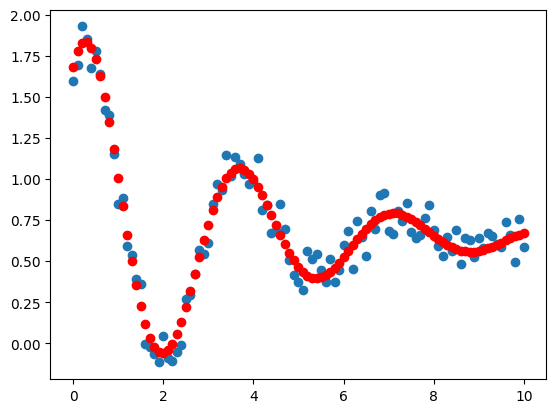

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(dat_x, dat_y)
plt.scatter(dat_x, pred_y, color="red")